# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")


# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [37]:
# Checking the number of mice.
combined_data["Mouse ID"].nunique()

249

In [38]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice


array(['g989'], dtype=object)

In [39]:
# Optional: Get all the data for the duplicate mouse ID. 
cleaned_data = combined_data.loc[combined_data["Mouse ID"] != "g989"]
duplicate_mice

array(['g989'], dtype=object)

In [40]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data[combined_data["Mouse ID"].isin(duplicate_mice)==False]
#display the clean data
cleaned_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [41]:
# Checking the number of mice in the clean DataFrame.
num_mice_cleaned = cleaned_data["Mouse ID"].nunique()
num_mice_cleaned

248

## Summary Statistics

In [42]:
#standardGenerate a summary statistics table of mean, median, variance, deviation, and SEM of the tumor volume for each regimen
#Drug Regimen data is in a DataFrame named df
grouped_data = cleaned_data.groupby("Drug Regimen")
# Calculate the mean for each regimen
mean_tumor_volume = grouped_data["Tumor Volume (mm3)"].mean()

# Calculate the median for each regimen
median_tumor_volume = grouped_data["Tumor Volume (mm3)"].median()

# Calculate the variance for each regimen
variance_tumor_volume = grouped_data["Tumor Volume (mm3)"].var()

# Calculate the standard deviation for each regimen
std_dev_tumor_volume = grouped_data["Tumor Volume (mm3)"].std()

# Calculate the SEM (Standard Error of the Mean) for each regimen
sem_tumor_volume = grouped_data["Tumor Volume (mm3)"].sem()

# Create a summary DataFrame
summary_stats_df = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_volume,
    "Median Tumor Volume": median_tumor_volume,
    "Variance Tumor Volume": variance_tumor_volume,
    "Std Dev Tumor Volume": std_dev_tumor_volume,
    "SEM Tumor Volume": sem_tumor_volume
})

# Display the summary statistics table
summary_stats_df



,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Std Dev Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [43]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_df = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std','sem'])
summary_stats_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

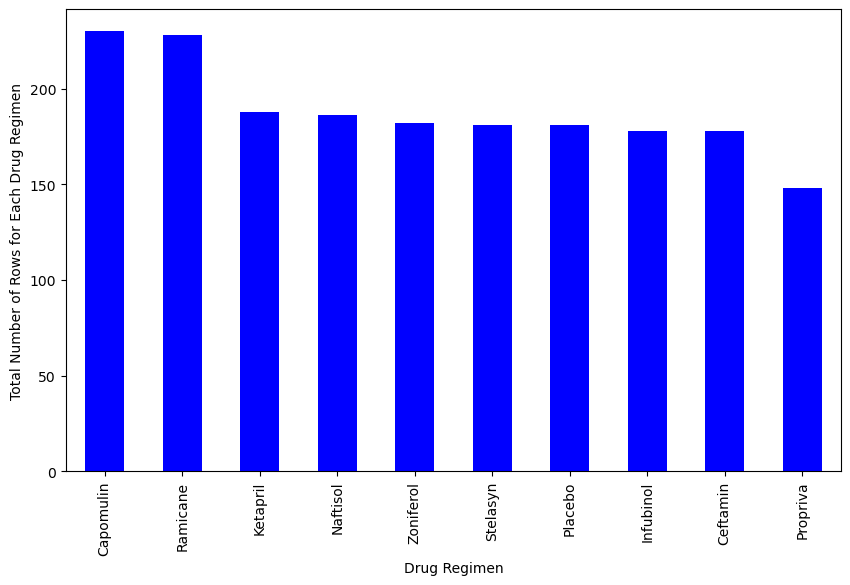

In [44]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#calculate the counts of rows for eacg regimen
regimen_counts = cleaned_data["Drug Regimen"].value_counts()
# Create a bar plot
regimen_counts.plot(kind='bar', figsize=(10, 6), color='blue')
# Add labels and a title
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Rows for Each Drug Regimen')

# Show the plot
plt.show()

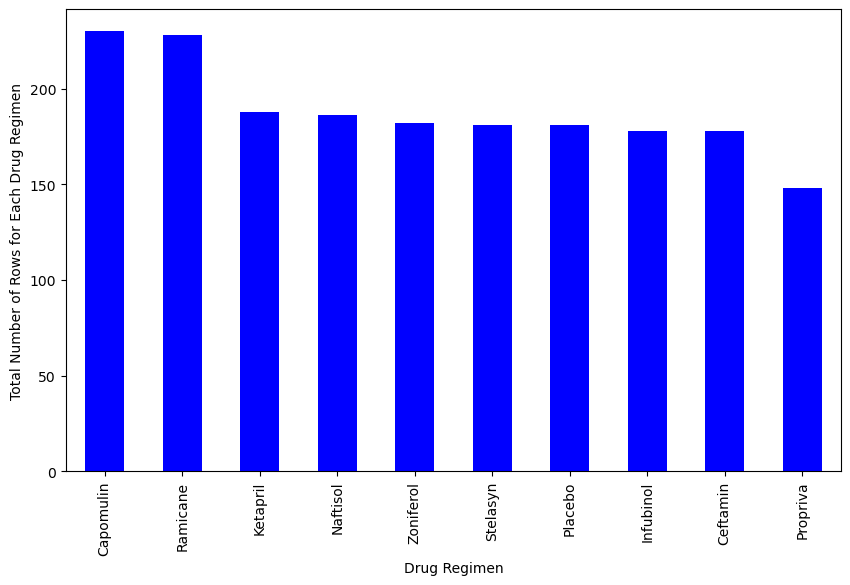

In [45]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Group the data by "Drug Regimen" and count the number of rows regimen_counts = your_cleaned_data["Drug Regimen"].value_counts() 

# Extract the drug regimens and counts as lists
regimens = regimen_counts.index.tolist()
counts = regimen_counts.tolist()
# Create a bar plot
regimen_counts.plot(kind='bar', figsize=(10, 6), color='blue')
# Add labels 
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Rows for Each Drug Regimen')

# Show the plot
plt.show()

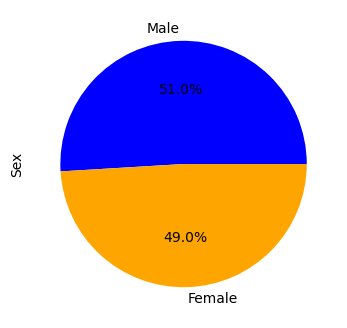

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Group the data by sex and count the number of mice in each category
gender_counts = cleaned_data["Sex"].value_counts()

# Create a pie plot using Pandas
plt.figure(figsize=(4, 4))
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'orange'])


# Show the plot
plt.show()

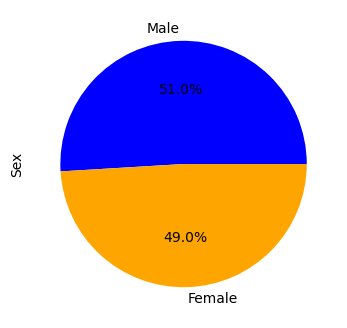

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Group the data by sex and count the number of mice in each category
gender_counts = cleaned_data["Sex"].value_counts()

# Create a pie plot using pypolt
plt.figure(figsize=(4, 4))
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'orange'])


# Show the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [114]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
filter_data = cleaned_data.groupby(['Mouse ID'])['Timepoint'].max()
filter_data = filter_data.reset_index()
final_tumor_volume_data = filter_data.merge(cleaned_data, on=['Mouse ID', 'Timepoint'], how = 'left')




In [158]:
# List of treatments for the for loop and plot labels
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create an empty list to store tumor volume data for each treatment
tumor_volume_data = []

# Loop through each treatment
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = final_tumor_volume_data.loc[final_tumor_volume_data["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # Append the tumor volume data to the list
    tumor_volume_data.append(tumor_volumes)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers
    quartiles = tumor_volumes.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Define lower and upper bounds for potential outliers
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    # Identify potential outliers
    potential_outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    # Print the results for each treatment with the treatment name
    print(f"{treatment}'s potential outliers: {potential_outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


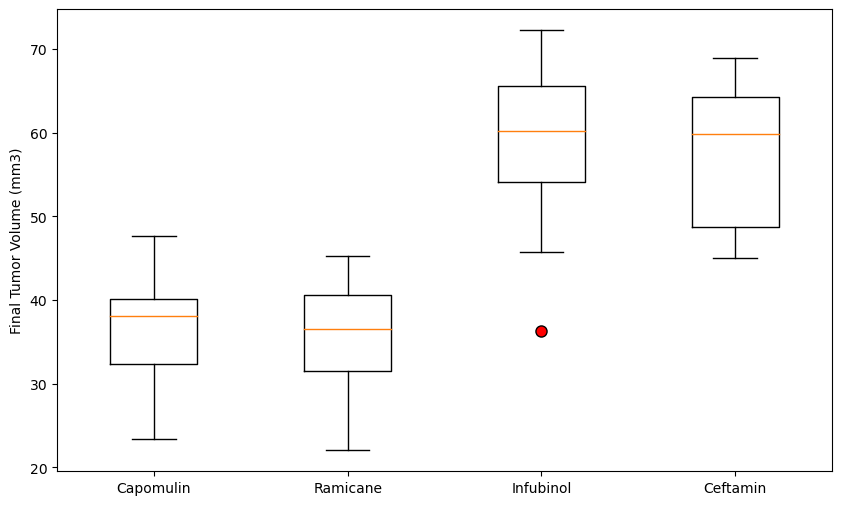

In [58]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_volume_data, labels=treatments, flierprops={'marker':'o', 'markerfacecolor':'red', 'markersize':8})

# Add labels
plt.ylabel("Final Tumor Volume (mm3)")

# Show the plot
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

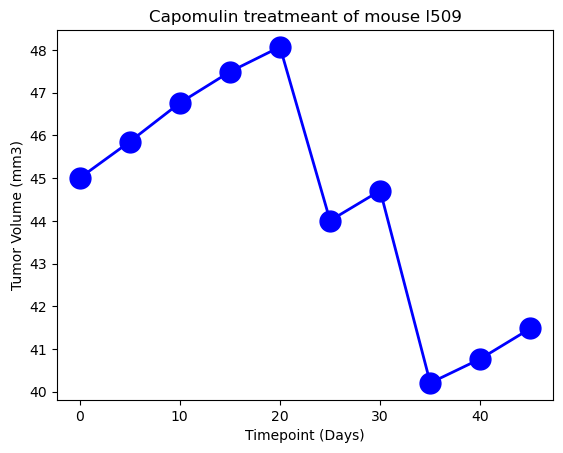

In [59]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Mouse_ID = 1507
capomulin_mouse_data = combined_data.loc[combined_data["Mouse ID"] == "l509",:]
capomulin_mouse_data.head
x_axis = capomulin_mouse_data["Timepoint"]
tumsiz = capomulin_mouse_data["Tumor Volume (mm3)"]
fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumsiz,linewidth=2, markersize=15,marker="o",color="blue", label="Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

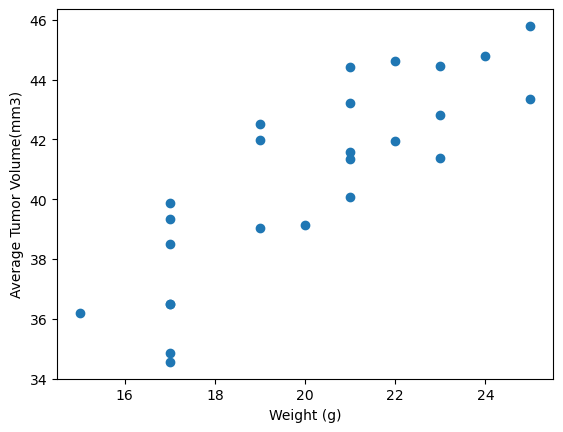

In [142]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_table = cleaned_data.loc[cleaned_data[ 'Drug Regimen'] == "Capomulin"]
capomulin_average = capomulin_table.groupby(['Mouse ID'])
mouse_weight = capomulin_average['Weight (g)'].mean()

tumor_volume = capomulin_average['Tumor Volume (mm3)']. mean ()
plt.scatter (mouse_weight, tumor_volume) 
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume(mm3)') 
plt. show ()

In [137]:
cleaned_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


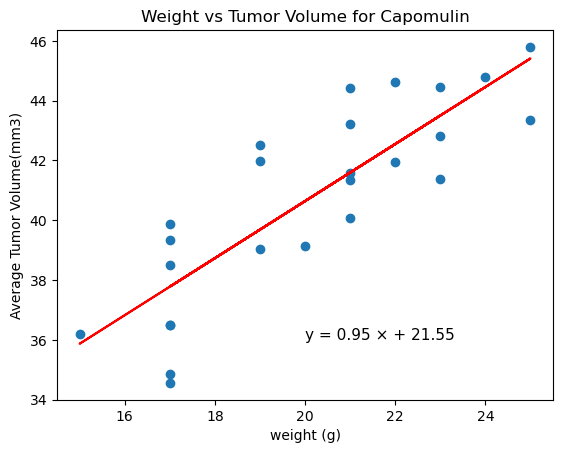

In [156]:
# Add the linear regression equation and line to plot
#Calculate the correlation coefficient and a Linear regression model
# for mouse weight and average observed tumor volume for the entire capomulin regimen
correlation_coefficient=round(st.pearsonr(mouse_weight, tumor_volume)[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient}")
linear_regression_model= st.linregress (mouse_weight,tumor_volume)
(slope, intercept, rvalue, pvalue, stderr)=linear_regression_model
regress_values=mouse_weight* slope + intercept 
line_eq= f"y = {round(slope, 2)} × + {round(intercept, 2)}"
y_values = mouse_weight*linear_regression_model[0]+linear_regression_model[1]
plt.scatter(mouse_weight, tumor_volume) 
pt.plot(mouse_weight ,y_values, color="red") 
plt.annotate(line_eq, (20,36), fontsize=11) 
plt.xlabel('weight (g)')
plt.ylabel('Average Tumor Volume(mm3)')
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()
